# 딥러닝 기초

> **주요 용어**



- 하이퍼 파라미터

- 과소적합 <-> 과대적합

- 에포크 <br>
: 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는 과정이다. 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 epoch라고 한다. 훈련 데이터 셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 1 에포크의 훈련 과정을 마치고 다음 에포크로 넘어간다. 사전에 설정된 최대 에포크 횟수까지 반복적으로 진행하고 종료된다


- 손실함수 <br>

: 손실함수를 설명할 수 있는 가장 쉬운 용어를 찾는다면 예측값과 정답값의 차이 또는 오차라고 말할 수 있다. <br>
: 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 한다. 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적이다.

: 지도학습의 분류 분제는 이진분류와 다중분류로 구분할 수 있다. <br>
이진 분류 문제를 해결하기 위해서는 "binary_crossentropy"손실함수를 사용하며, 출력층의 활성화 함수가 시그모이드인 경우를 말한다. <br>
다중 분류 문제는 "categorical-crossentropy" 손실함수를 사용하며, 다중분류의 대상이 되는 클래스가 원핫벡터인 경우 사용한다 <br>
정답클래스가 원핫인코딩이 아닌 레이블 값(0,1,2,3,,,)으로 표현되어 서로 다른 숫자로 구분되어 있으면 "sparse_categorical_crossentropy"손실함수를 사용한다

: 한편 회귀 모델의 경우 평균제곱오차(mse),평균절대값오차(mae),후버 등이 사용된다 

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()
# 함수 
#tf.keras.losses.binary_crossentropy() -> 함수이기 때문에 인자가 필요해 주석처리

2024-05-20 17:22:31.570160: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- 경사하강법<br>

: 경사하강법은 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수를 갖도록 하는 방법이다 <br>
: 딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다. 경사하강법은 현재 공개된 다양한 옵티마이저(최적화 함수)의 근간이 되는 알고리즘이다

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 샘플에 활용할 데이터셋 만들기

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w*x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y+noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y= {w} * x + {b}') 
    plt.scatter(x,yy,label="data")
    plt.legend(fontsize=20)
    plt.show()
    print(f'w:{w}, b:{b}')
    return x, yy

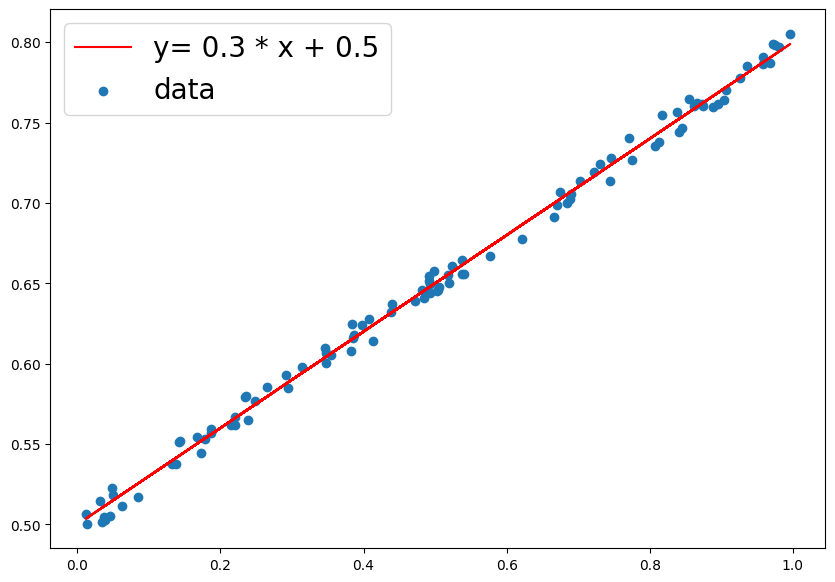

w:0.3, b:0.5


In [10]:
x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

-> 단순선형회귀 수식이 주어졌을 때 손실함수를 최소로 하는 w와 b값을 구하는 과정

경사하강법 알고리즘의 핵심인 w,b에 대한 그래디언트를 구하는 부분 구현<br>
: 그래디언트는 손실함수를 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w,b로부터 차감한다 

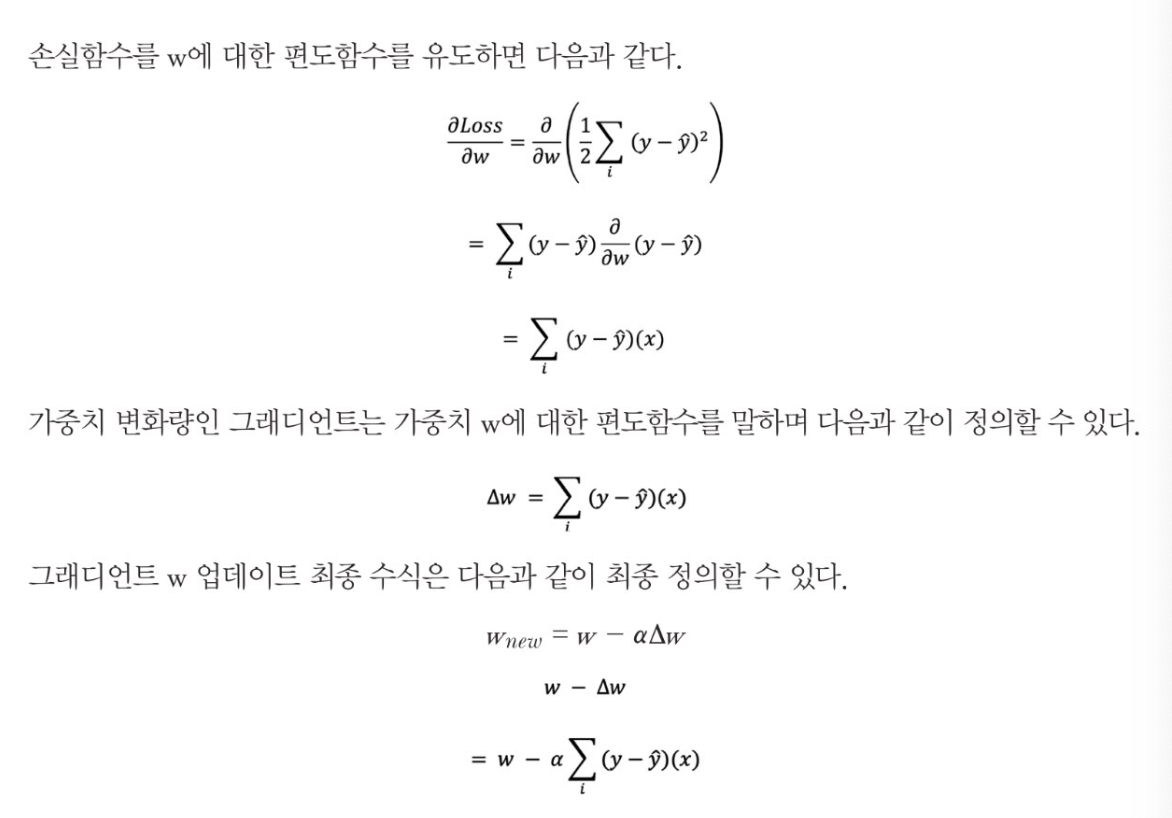

In [6]:
Image("/Users/ijiseon/Desktop/경사하강법.png")

In [21]:
#최대 반복 횟수
num_epoch =1000

#학습률
learning_rate = 0.005

#에러 기록
errors = []

#random 한 값으로 w,b를 초기화
w=np.random.uniform(low=0.0, high=1.0)
b=np.random.uniform(low=0.0, high=1.0)

In [22]:
for epoch in range(num_epoch):
    #Hypothesis 정의
    y_hat = w*x+b
    
    #LossFunction 정의
    error = 0.5*((y_hat - y)**2).sum()
    if error < 0.005:
        break
        
    #Gradient 미분 계산 
    w = w - learning_rate * ((y_hat -y)*x).sum() 
    b = b - learning_rate * (y_hat -y).sum() 
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b={2:.5f} error = {3:.5f}".format(epoch, w,b,error))
        
print("---------"*8)
print("{0:2} w = {1:.1f}, b={2:.1f} error = {3:.5f}".format(epoch, w,b,error))

 0 w = 0.39120, b=0.44541 error = 0.05235
 5 w = 0.37843, b=0.45739 error = 0.03053
10 w = 0.36594, b=0.46417 error = 0.02198
15 w = 0.35544, b=0.46984 error = 0.01596
20 w = 0.34662, b=0.47461 error = 0.01172
25 w = 0.33921, b=0.47861 error = 0.00872
30 w = 0.33300, b=0.48197 error = 0.00661
35 w = 0.32777, b=0.48479 error = 0.00512
------------------------------------------------------------------------
36 w = 0.3, b=0.5 error = 0.00488


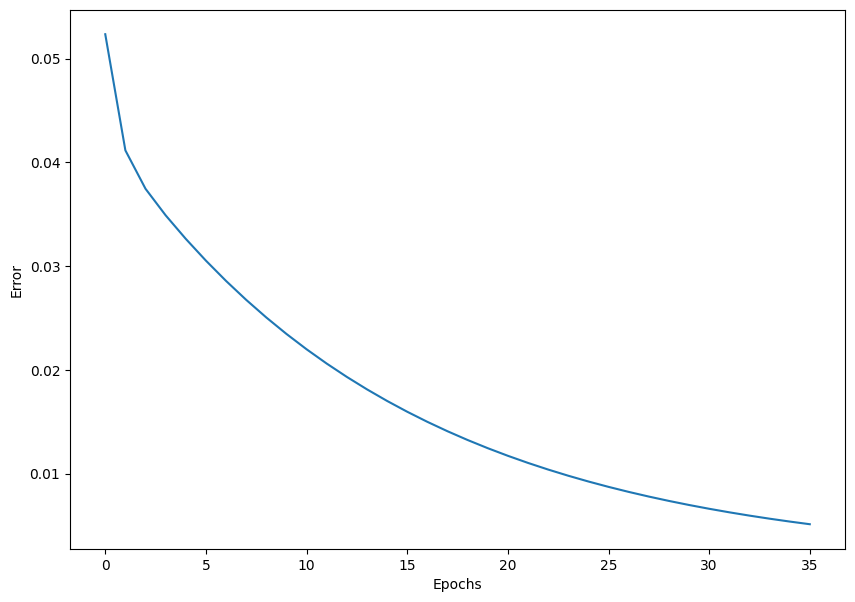

In [23]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 딥러닝 프로세스

1. 데이터 전처리
2. 모델 생성 <br>
   : 모델의 구조를 정의하고 생성하는 단계. <br>
   : 모델을 생성하는 방법은 크게 세 가지로 구분할 수 있음 <br>
   -> 순차적인 구조의 모델은 Sequential API로 구현한다 
   -> 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API/Model Subclassing 방법으로 구현
3. 모델 컴파일 <br>
   : 딥러닝 모델의 구조를 정의하고 생성한 뒤에는, 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표 (metrics) 등을 정의한다. 모델 인스턴스에 compile() 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정한다. 이 과정을 컴파일 단계라고 한다. 
4. 모델 훈련
5. 모델 검증
6. 모델 예측


# 단순 신경망 훈련

- 뉴런 <br>

뉴런은 인공 신경망 모델을 구성하는 하나의 신경을 의미한다. 뉴런은 노드라고도 불리우고 같은 의미를 가지며 혼용하여 사용한다. 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성된다. 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 된다. 

역전파 알고리즘은 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법을 의미한다. 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장한다. 

- Dense 레이어 <br>

Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어다. 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층이라고 부르기도 한다. 

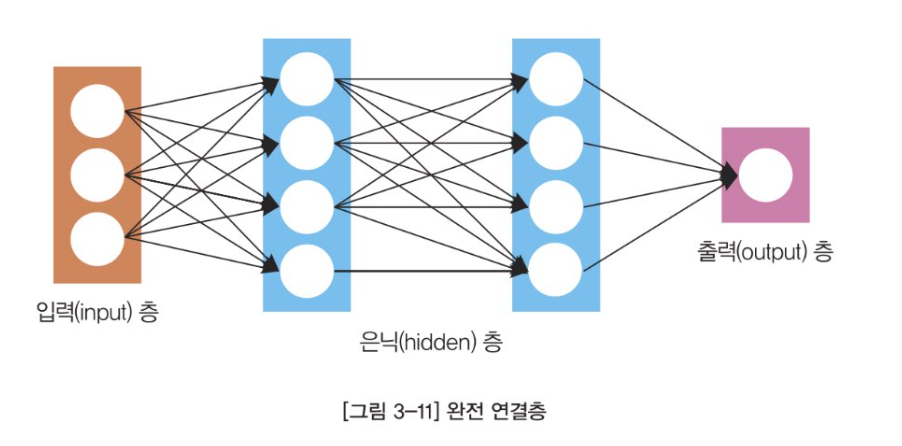

In [4]:
from IPython.display import Image
Image("/Users/ijiseon/Desktop/레이어.png")

-> 4개의 Dense 레이어로 구성된 모델 <br>
: 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성.<br>
각 레이어는 1개 이상의 뉴런으로 구성된다. 입력 레이어는 3개의 뉴런이 있고 출력 레이어는 1개의 뉴런을 갖는다 <br>
모든 뉴러들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어서 완전 연결층이라고 정의한다

Dense 레이어를 구성하는 노드 개수와 활성화함수를 지정할 수 있다. 텐서플로의 layer모듈에 있는 Dense 레이어로 쉽게 구현할 수 있다. 노드의 개수를 Dense 레이어의 첫번째 위치 인자로 지정하면 된다. 또한 Dense 레이어의 activation 매개변수에 활성화함수를 지정하여 적용할 수 있다

In [24]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLu 활성화 함수 적용
tf.keras.layers.Dense(10, activation ="relu")

In [25]:
x = np.arange(1,6)

y = 3*x + 2

print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


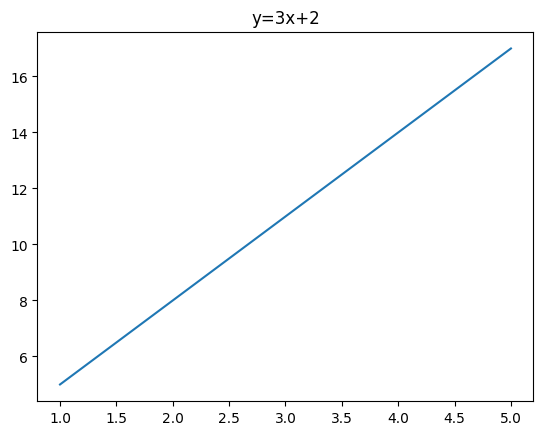

In [26]:
plt.plot(x,y)
plt.title("y=3x+2")
plt.show()

- Sequential API

In [28]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [29]:
# add 함수로 레이어 추가

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [31]:
model = tf.keras.Sequential([
    #입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
]) 

In [32]:
# 단순선형회귀 모델 생성

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- 컴파일 

In [34]:
# 긴문자열지정
model.compile(optimizer='sgd', loss='mean _squared _error',
              metrics=['mean _squared _error', 'mean _absolute_error'])

In [35]:
# 짧은문자열지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [37]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
             loss=tf.keras.losses.MeanAbsoluteError(),
             metrics=[tf.keras.metrics.MeanAbsoluteError(),
                     tf.keras.metrics.MeanSquaredError()])

In [38]:
# 컴파일 
model.compile(optimizer="sgd",loss="mse",metrics=["mae"])

- 훈련 / 검증 / 예측 

In [39]:
# 훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 397ms/step - loss: 184.8612 - mae: 12.6378
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 107.7947 - mae: 9.6847
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 62.8837 - mae: 7.4303
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 36.7114 - mae: 5.7092
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 21.4590 - mae: 4.3952


In [46]:
# 단순 선형회귀 모델 생성

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#컴파일 
model.compile(optimizer="sgd",loss="mse",metrics=["mae"])

# 훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 366ms/step - loss: 302.3943 - mae: 16.0741
Epoch 2/1200
1/1 [==============================] - 0s 8ms/step - loss: 176.2521 - mae: 12.2963
Epoch 3/1200
1/1 [==============================] - 0s 6ms/step - loss: 102.7424 - mae: 9.4123
Epoch 4/1200
1/1 [==============================] - 0s 9ms/step - loss: 59.9044 - mae: 7.2107
Epoch 5/1200
1/1 [==============================] - 0s 7ms/step - loss: 34.9403 - mae: 5.5299
Epoch 6/1200
1/1 [==============================] - 0s 7ms/step - loss: 20.3923 - mae: 4.2467
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 11.9142 - mae: 3.2671
Epoch 8/1200
1/1 [==============================] - 0s 7ms/step - loss: 6.9734 - mae: 2.5192
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 4.0939 - mae: 1.9481
Epoch 10/1200
1/1 [==============================] - 0s 8ms/step - loss: 2.4157 - mae: 1.5121
Epoch 11/1200
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step - loss: 0.0240 - mae: 0.1331
Epoch 174/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0239 - mae: 0.1326
Epoch 175/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0237 - mae: 0.1322
Epoch 176/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0236 - mae: 0.1317
Epoch 177/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0234 - mae: 0.1313
Epoch 178/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0232 - mae: 0.1308
Epoch 179/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0231 - mae: 0.1304
Epoch 180/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0229 - mae: 0.1300
Epoch 181/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0228 - mae: 0.1295
Epoch 182/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0226 - mae: 0.1291
Epoch 183/1200
1/1 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 9ms/step - loss: 0.0075 - mae: 0.0743
Epoch 346/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0074 - mae: 0.0741
Epoch 347/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0074 - mae: 0.0738
Epoch 348/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0736
Epoch 349/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0073 - mae: 0.0733
Epoch 350/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0072 - mae: 0.0731
Epoch 351/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0072 - mae: 0.0728
Epoch 352/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0071 - mae: 0.0726
Epoch 353/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - mae: 0.0723
Epoch 354/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - mae: 0.0721
Epoch 355/1200
1/1 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0415
Epoch 518/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0414
Epoch 519/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0412
Epoch 520/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0023 - mae: 0.0411
Epoch 521/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0409
Epoch 522/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0408
Epoch 523/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0407
Epoch 524/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0405
Epoch 525/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0022 - mae: 0.0404
Epoch 526/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0022 - mae: 0.0403
Epoch 527/1200
1/1 [==============================] - 0s 9ms/step

Epoch 603/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0310
Epoch 604/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - mae: 0.0309
Epoch 605/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0308
Epoch 606/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0307
Epoch 607/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0306
Epoch 608/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0013 - mae: 0.0305
Epoch 609/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0304
Epoch 610/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0303
Epoch 611/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - mae: 0.0302
Epoch 612/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.0012 - mae: 0.0301
Epoch 613/1200
1/1 [==========================

1/1 [==============================] - 0s 7ms/step - loss: 4.2425e-04 - mae: 0.0177
Epoch 770/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.2138e-04 - mae: 0.0176
Epoch 771/1200
1/1 [==============================] - 0s 7ms/step - loss: 4.1854e-04 - mae: 0.0176
Epoch 772/1200
1/1 [==============================] - 0s 8ms/step - loss: 4.1571e-04 - mae: 0.0175
Epoch 773/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.1291e-04 - mae: 0.0174
Epoch 774/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.1012e-04 - mae: 0.0174
Epoch 775/1200
1/1 [==============================] - 0s 7ms/step - loss: 4.0735e-04 - mae: 0.0173
Epoch 776/1200
1/1 [==============================] - 0s 8ms/step - loss: 4.0461e-04 - mae: 0.0173
Epoch 777/1200
1/1 [==============================] - 0s 8ms/step - loss: 4.0188e-04 - mae: 0.0172
Epoch 778/1200
1/1 [==============================] - 0s 11ms/step - loss: 3.9915e-04 - mae: 0.0171
Epoch 779/1200
1/1 [====

1/1 [==============================] - 0s 7ms/step - loss: 1.3970e-04 - mae: 0.0101
Epoch 934/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.3875e-04 - mae: 0.0101
Epoch 935/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.3781e-04 - mae: 0.0101
Epoch 936/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.3688e-04 - mae: 0.0100
Epoch 937/1200
1/1 [==============================] - 0s 6ms/step - loss: 1.3596e-04 - mae: 0.0100
Epoch 938/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.3504e-04 - mae: 0.0100
Epoch 939/1200
1/1 [==============================] - 0s 6ms/step - loss: 1.3412e-04 - mae: 0.0099
Epoch 940/1200
1/1 [==============================] - 0s 6ms/step - loss: 1.3323e-04 - mae: 0.0099
Epoch 941/1200
1/1 [==============================] - 0s 6ms/step - loss: 1.3232e-04 - mae: 0.0099
Epoch 942/1200
1/1 [==============================] - 0s 8ms/step - loss: 1.3143e-04 - mae: 0.0098
Epoch 943/1200
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 4.6001e-05 - mae: 0.0058
Epoch 1098/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.5693e-05 - mae: 0.0058
Epoch 1099/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.5384e-05 - mae: 0.0058
Epoch 1100/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.5075e-05 - mae: 0.0058
Epoch 1101/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.4769e-05 - mae: 0.0057
Epoch 1102/1200
1/1 [==============================] - 0s 8ms/step - loss: 4.4468e-05 - mae: 0.0057
Epoch 1103/1200
1/1 [==============================] - 0s 7ms/step - loss: 4.4165e-05 - mae: 0.0057
Epoch 1104/1200
1/1 [==============================] - 0s 7ms/step - loss: 4.3870e-05 - mae: 0.0057
Epoch 1105/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.3576e-05 - mae: 0.0057
Epoch 1106/1200
1/1 [==============================] - 0s 6ms/step - loss: 4.3280e-05 - mae: 0.0056
Epoch 1107/1200


1/1 [==============================] - 0s 8ms/step - loss: 2.6397e-05 - mae: 0.0044
Epoch 1180/1200
1/1 [==============================] - 0s 8ms/step - loss: 2.6219e-05 - mae: 0.0044
Epoch 1181/1200
1/1 [==============================] - 0s 7ms/step - loss: 2.6043e-05 - mae: 0.0044
Epoch 1182/1200
1/1 [==============================] - 0s 7ms/step - loss: 2.5868e-05 - mae: 0.0044
Epoch 1183/1200
1/1 [==============================] - 0s 8ms/step - loss: 2.5690e-05 - mae: 0.0044
Epoch 1184/1200
1/1 [==============================] - 0s 9ms/step - loss: 2.5518e-05 - mae: 0.0043
Epoch 1185/1200
1/1 [==============================] - 0s 8ms/step - loss: 2.5345e-05 - mae: 0.0043
Epoch 1186/1200
1/1 [==============================] - 0s 9ms/step - loss: 2.5176e-05 - mae: 0.0043
Epoch 1187/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.5006e-05 - mae: 0.0043
Epoch 1188/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.4838e-05 - mae: 0.0043
Epoch 1189/120

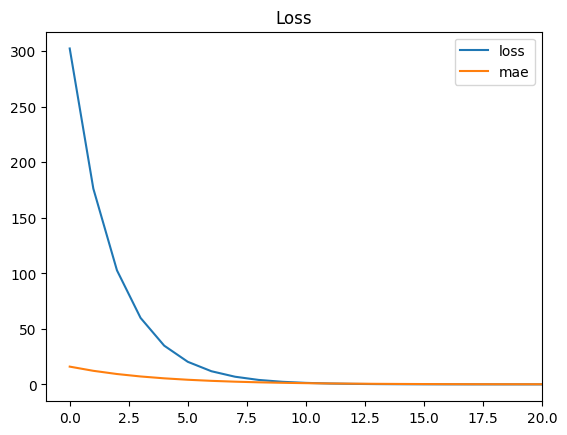

In [48]:
plt.plot(history.history['loss'],label='loss') 
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1, 20)
plt.title('Loss') 
plt.legend() 
plt.show()

In [49]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 158ms/step - loss: 2.2740e-05 - mae: 0.0041


[2.2739881387678906e-05, 0.004092884249985218]

In [50]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 113ms/step


array([[32.019783]], dtype=float32)

# 심층 신경망으로 이미지 분류

In [51]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [52]:
print("train set:" ,x_train.shape,y_train.shape)
print("test set:" ,x_test.shape,y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


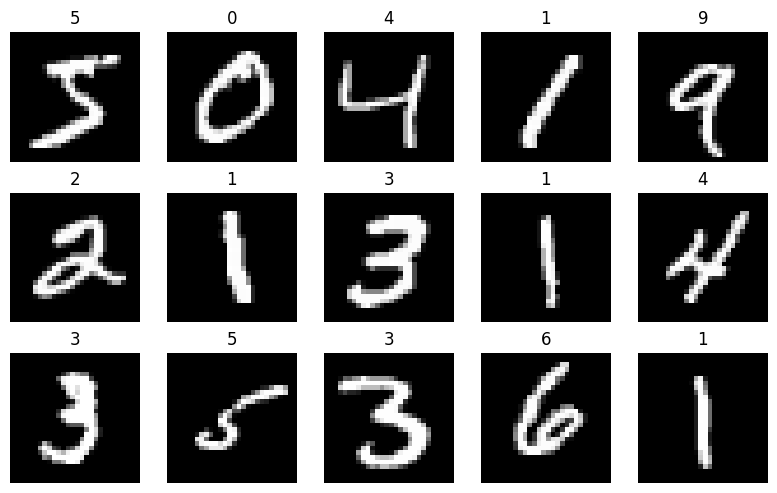

In [53]:
#canvas 생성
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5,i%5]
    #imshow로 이미지 시각화
    ax.imshow(x_train[i],cmap="gray")
    ax.axis("off")
    ax.set_title(str(y_train[i]))
    
plt.tight_layout()
plt.show()

- 데이터 전처리 

In [54]:
# x_train 배열의 데이터 확인

x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [56]:
print(f"정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}")

x_train = x_train/x_train.max()

print(f"정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}")

정규화 전] 최소값: 0, 최대값: 255
정규화 전] 최소값: 0.0, 최대값: 1.0


In [55]:
x_test = x_test/x_test.max()

In [57]:
# 변환 후 x_train 배열의 데이터 확인

x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

- Flatten 레이어

2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없다. Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 한다
Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐줄 수 있다. 

In [60]:
print(f"변경 전 shape: {x_train.shape}")
print(f"ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}")

변경 전 shape: (60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


(60000, 28, 28) -> 데이터 크기 / 28,28은 이미지의 크기 <br>

In [61]:
print(f"변경 전 shape: {x_train.shape}")

print(f"Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}")

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


- 활성화 함수 

: 활성화 함수는 입력을 비선형 출력으로 변환해주는 함수이다. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 한다. 한편, 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현된다. 

In [62]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우

tf.keras.layers.Dense(128,activation="relu")

In [63]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation("relu")
])

- 입력과 출력 

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    # 노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10,activation="softmax")
])

In [65]:
# 출력층 노드=1인 경우 sigmoid
tf.keras.layers.Dense(1,activation="sigmoid")
# 출력층 노드=2 이상인 경우 softmax
tf.keras.layers.Dense(10,activation="softmax")

- 손실함수 

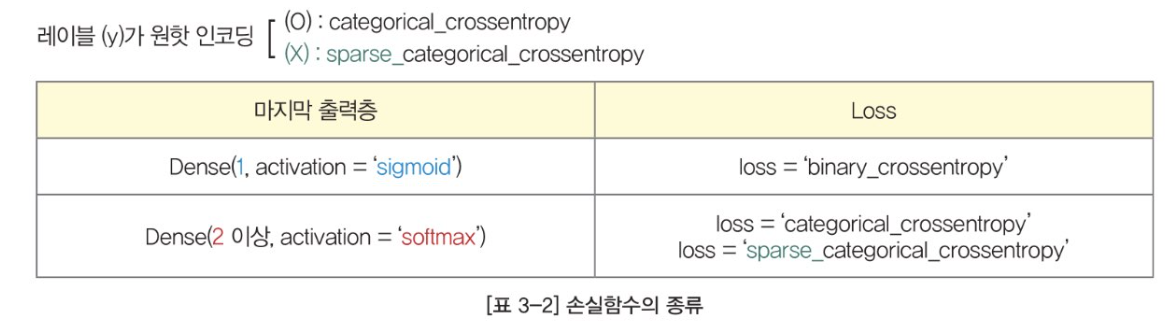

In [5]:
Image("/Users/ijiseon/Desktop/손실함수.png")

In [67]:
#이진분류 (출력 노드 개수 =1 , sigmoid인 경우)
model.compile(loss="binary_crossentropy")

In [68]:
#y가 원핫 벡터인 경우 
model.compile(loss="binary_crossentropy")
#y가 원핫 벡터가 아닌 경우 
model.compile(loss="sparse_categorical_crossentropy")

- 옵티마이저 

: 옵티마이저는 손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법이다. 일반적으로 많이 사용되는 알고리즘은 Adam이며 대체적으로 좋은 성능을 발휘하는 것으로 알려져 있다

In [69]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer="adam")

In [71]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=[acc])

In [72]:
# 문자열로 지정 
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

- 훈련/ 평가/ 예측 

In [73]:
model.fit(x_train,y_train,
         validation_data=(x_test,y_test),
         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2342 - accuracy: 0.9315 - val_loss: 0.1058 - val_accuracy: 0.9671
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0939 - accuracy: 0.9715 - val_loss: 0.0863 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0778 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0494 - accuracy: 0.9839 - val_loss: 0.0925 - val_accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0698 - val_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0725 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0830 - val_acc

In [74]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("검증 셋 정확도:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9793
검증 셋 정확도: 0.9793000221252441


In [75]:
#예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [76]:
#예측 결과 출력
predictions[0]

array([5.5822818e-07, 8.5331192e-07, 4.6314242e-05, 1.3691594e-04,
       1.5570473e-08, 1.6065131e-06, 1.5273991e-13, 9.9980974e-01,
       3.6054862e-06, 2.9792787e-07], dtype=float32)

In [77]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))
# 첫 10개 index에 대한 예측 클래스 출력 
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


In [78]:
# 데이터 시각화

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    
    return img,y_true, y_pred, confidence

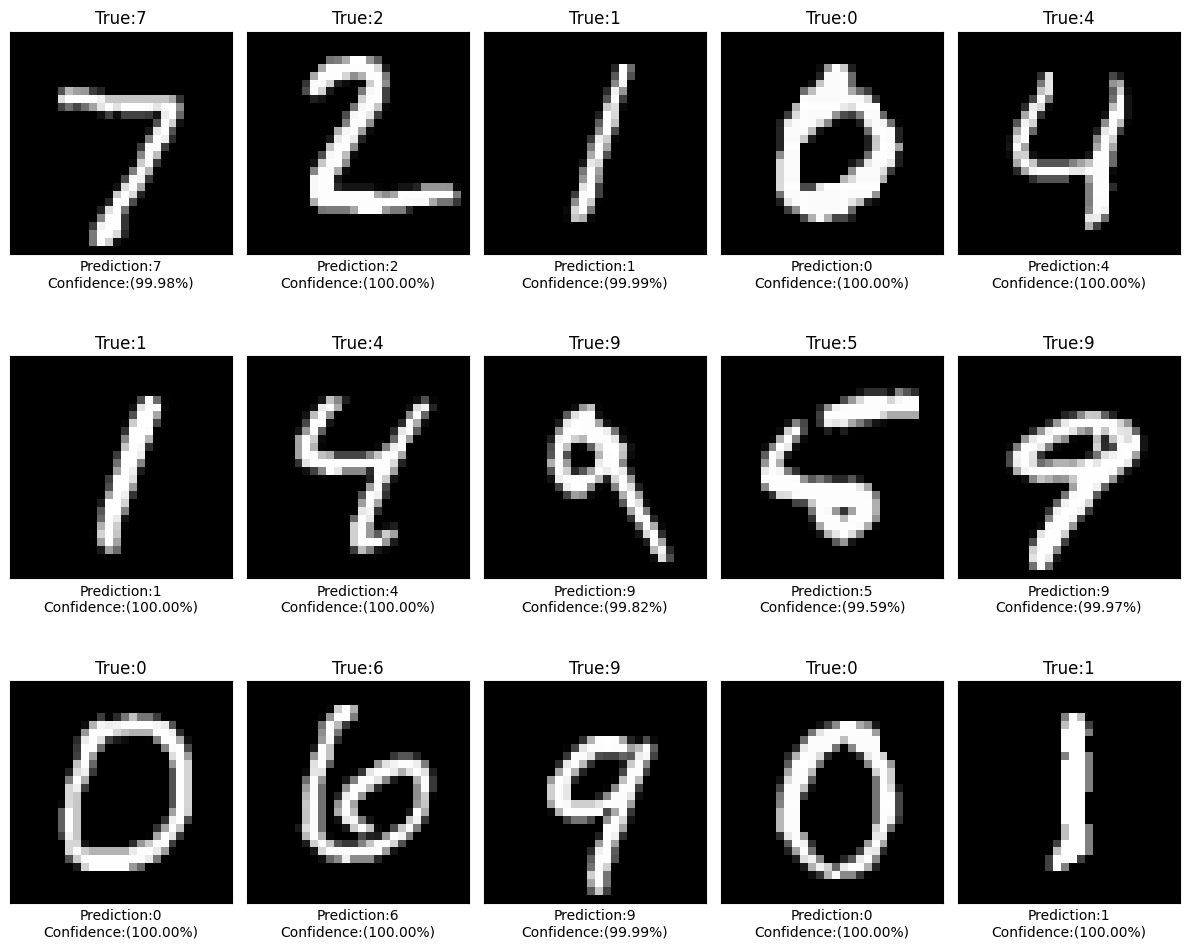

In [79]:
# canvas 생성

fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    
    #imshow로 이미지 시각화
    ax.imshow(img,cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"True:{y_true}")
    ax.set_xlabel(f"Prediction:{y_pred}\nConfidence:({confidence:.2f}%)")
    
plt.tight_layout()
plt.show()